In [5]:
import pandas as pd
import os
import matplotlib.pyplot as plt


In [6]:
caminho = os.path.join('..', '..', 'db_softtek') 
path_arq = os.path.abspath(caminho)

In [7]:
tbl_anl = pd.read_excel(path_arq+'\\cubo_anl\\tbl_full_analitica.xlsx')

In [8]:
#verificando se há valores nulos no data set:

tbl_anl.isnull().sum()

PROJETO                   0
CHAMADO                   0
Column1                   0
DT_ABERTURA_CHAMADO       0
MODULO_CHAMADO            0
TIPO_CHAMADO              0
STATUS_CHAMADO            0
IS                        0
CONSULTOR                 0
MODULO_CustosNSULTOR      0
EXERCICIO                 0
PERIODO                   0
DIA                       0
HORAS                     0
TIPO_HORAS                0
COMPLEXIDADE              0
NOME                      0
CODIGO_AT                 0
DESCRICAO_AT              0
SENIORIDADE               0
AUSENCIA_INI              0
AUSENCIA_FIN              0
AUSENCIA_TIPO             0
VALOR_AT                  0
DESCRICAO                 0
TIPO_CONTRATO             0
MODULO                    0
TIPO_DEMANDA              0
BASELINE                  0
VALOR CONTRATO            0
EXPERT                    0
CUSTO_VENDA_EXPERT        0
SENIOR                    0
CUSTO_VENDA_SENIOR        0
PLENO                     0
CUSTO_VENDA_PLENO   

In [9]:
tbl_anl.dtypes

PROJETO                           object
CHAMADO                           object
Column1                            int64
DT_ABERTURA_CHAMADO               object
MODULO_CHAMADO                    object
TIPO_CHAMADO                      object
STATUS_CHAMADO                    object
IS                                object
CONSULTOR                         object
MODULO_CustosNSULTOR              object
EXERCICIO                          int64
PERIODO                            int64
DIA                                int64
HORAS                            float64
TIPO_HORAS                        object
COMPLEXIDADE                      object
NOME                              object
CODIGO_AT                         object
DESCRICAO_AT                      object
SENIORIDADE                       object
AUSENCIA_INI                      object
AUSENCIA_FIN                      object
AUSENCIA_TIPO                     object
VALOR_AT                         float64
DESCRICAO       

In [10]:
# tipando campos necessários:

tbl_anl['VALOR CONTRATO'] = tbl_anl['VALOR CONTRATO'].astype(float)

In [11]:
tbl_anl.describe()

,Column1,EXERCICIO,PERIODO,DIA,HORAS,VALOR_AT,BASELINE,VALOR CONTRATO,EXPERT,CUSTO_VENDA_EXPERT,...,PLENO,CUSTO_VENDA_PLENO,JUNIOR,CUSTO_VENDA_JUNIOR,ESTAGIARIO,CUSTO_VENDA_ESTAGIARIO,HORAS_GESTAO,CUSTO_VENDA_GESTAO,INICIO_CONTRATO,FIM_CONTRATO
count,999.000000,999.0,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,9.990000e+02,...,999.000000,9.990000e+02,999.000000,999.00,999.000000,9.990000e+02,999.000000,999.00,999,999
mean,10.310310,2024.0,1.972973,15.298298,2.383504,43.691570,217.889890,14147.427427,0.038238,7.178000e+01,...,0.339740,5.313000e+01,0.198498,24.15,0.160260,1.449000e+01,32.683483,77.02,2024-01-01 00:00:00,2024-12-31 00:00:00
min,1.000000,2024.0,1.000000,1.000000,0.140000,13.636364,70.000000,1680.000000,0.000000,7.178000e+01,...,0.000000,5.313000e+01,0.100000,24.15,0.000000,1.449000e+01,10.500000,77.02,2024-01-01 00:00:00,2024-12-31 00:00:00
25%,2.000000,2024.0,1.000000,8.000000,0.700000,22.727273,252.000000,16800.000000,0.000000,7.178000e+01,...,0.400000,5.313000e+01,0.100000,24.15,0.000000,1.449000e+01,37.800000,77.02,2024-01-01 00:00:00,2024-12-31 00:00:00
50%,7.000000,2024.0,2.000000,15.000000,1.400000,36.363636,252.000000,16800.000000,0.000000,7.178000e+01,...,0.400000,5.313000e+01,0.100000,24.15,0.100000,1.449000e+01,37.800000,77.02,2024-01-01 00:00:00,2024-12-31 00:00:00
75%,14.000000,2024.0,3.000000,22.000000,2.800000,63.636364,280.000000,19600.000000,0.100000,7.178000e+01,...,0.500000,5.313000e+01,0.100000,24.15,0.100000,1.449000e+01,42.000000,77.02,2024-01-01 00:00:00,2024-12-31 00:00:00
max,49.000000,2024.0,3.000000,31.000000,13.580000,100.000000,280.000000,19600.000000,0.100000,7.178000e+01,...,0.500000,5.313000e+01,0.500000,24.15,0.500000,1.449000e+01,42.000000,77.02,2024-01-01 00:00:00,2024-12-31 00:00:00
std,10.712391,0.0,0.828035,8.353123,2.619132,24.861009,85.441538,7232.533191,0.048621,2.843595e-14,...,0.199077,7.108986e-15,0.172416,0.00,0.199077,1.777247e-15,12.816231,0.00,NaN,NaN


In [12]:
## Regras de negócio:

# 1 - Melhorar eficiencia em horas do volume de tratativas
# 2 - Melhorar a distribuição de demandas de acordo com o capacity de cada operador
# 3 - Melhorar a relação de custos de acordo com o capacity

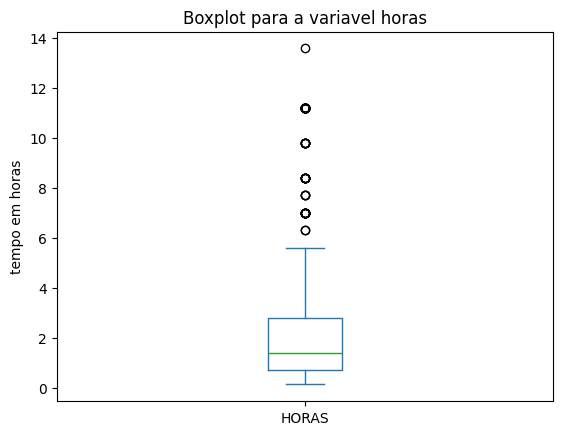

In [13]:

tbl_anl.HORAS.plot(kind='box')
plt.title('Boxplot para a variavel horas')
plt.ylabel('tempo em horas')
plt.show()

In [14]:
# Solução para variável horas: Dividir em grupos de forma categorizada


# Função que verificaa o intervalo e retornar a marcação correspondente:

def verifica_intervalo(valor):
    if 0 < valor <= 2:
        return 'MAIOR que 0 e MENOR OU IGUAL a 2' # media
    elif 2 < valor <= 4:
        return 'MAIOR que 2 e MENOR OU IGUAL a 4' # media superior
    elif 4 < valor <= 6:
        return 'MAIOR que 4 e MENOR OU IGUAL a 6' # cauda
    elif valor > 6:
        return 'MAIOR que 6' # Outliers
    else:
        return 'fora dos intervalos' # dados invalidos


tbl_anl['intervalo_horas']= tbl_anl['HORAS'].apply(verifica_intervalo)

In [15]:
# validação da marcação:

tbl_anl[['HORAS','intervalo_horas']]

,HORAS,intervalo_horas
0,2.8,MAIOR que 2 e MENOR OU IGUAL a 4
1,1.4,MAIOR que 0 e MENOR OU IGUAL a 2
2,0.7,MAIOR que 0 e MENOR OU IGUAL a 2
3,2.1,MAIOR que 2 e MENOR OU IGUAL a 4
4,4.2,MAIOR que 4 e MENOR OU IGUAL a 6
...,...,...
994,0.7,MAIOR que 0 e MENOR OU IGUAL a 2
995,1.4,MAIOR que 0 e MENOR OU IGUAL a 2
996,1.4,MAIOR que 0 e MENOR OU IGUAL a 2
997,4.2,MAIOR que 4 e MENOR OU IGUAL a 6


Text(0.5, 1.0, 'Histograma da variavel de Custos')

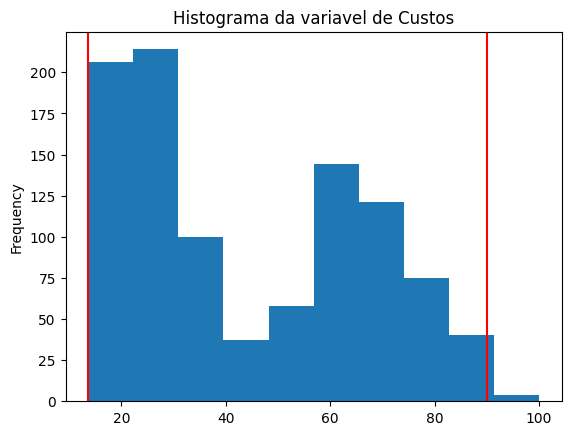

In [16]:
tbl_anl.VALOR_AT.plot(kind='hist',bins=10)
plt.axvline(tbl_anl.VALOR_AT.quantile(q=0.025), c='r')
plt.axvline(tbl_anl.VALOR_AT.quantile(q=0.975), c='r')    
plt.title('Histograma da variavel de Custos')

In [17]:
## Conclusão do histograma de valores: 

# Frequencia de valores acima de 97,5% é muito pequena (pode ser tratado de outra forma no modelo)

In [18]:
tbl_consultor = tbl_anl[tbl_anl['STATUS_CHAMADO'] == 'Closed']
tbl_consultor = tbl_consultor.groupby(['IS','MODULO_CHAMADO','TIPO_CHAMADO','MODULO_CustosNSULTOR','COMPLEXIDADE','SENIORIDADE']).agg(
    {'HORAS':'min','VALOR_AT':'min','CHAMADO':'count'}).reset_index()

In [19]:
tbl_consultor2 = tbl_consultor.groupby(['TIPO_CHAMADO','MODULO_CHAMADO','COMPLEXIDADE','IS','SENIORIDADE']).agg({'CHAMADO':'mean','HORAS':'min',
                                                                                         'VALOR_AT':'min'}).reset_index().sort_values(
                                                                                             ['TIPO_CHAMADO', 'MODULO_CHAMADO','COMPLEXIDADE',
                                                                                             'CHAMADO','HORAS','VALOR_AT'],
                                                                                               ascending=[True,True, True, False,True,True]
                                                                                               )
tbl_consultor2

,TIPO_CHAMADO,MODULO_CHAMADO,COMPLEXIDADE,IS,SENIORIDADE,CHAMADO,HORAS,VALOR_AT
1,Manutenção,Compras,N1,JDEF,Pr,13.0,0.70,36.363636
2,Manutenção,Compras,N1,RBR1,Bg,8.0,0.70,15.000000
3,Manutenção,Compras,N1,RTEC,Sr,4.0,0.70,63.636364
4,Manutenção,Compras,N1,T3JFBD,Sr,2.0,1.40,50.000000
0,Manutenção,Compras,N1,BMIR,Sr,2.0,1.40,63.636364
...,...,...,...,...,...,...,...,...
130,Suporte,Vendas,N1,PMSN,Pr,1.0,5.60,40.000000
132,Transporte,Infra,N2,FANT,Jr,12.0,0.70,22.727273
134,Transporte,Infra,N2,IFGO,Bg,10.0,0.42,13.636364
133,Transporte,Infra,N2,GRIA,Jr,2.0,0.42,22.727273


In [20]:
# Normalizando as métricas de forma linear ponderada

tbl_consultor2['volume_normalizado'] = tbl_consultor2['CHAMADO'] / tbl_consultor2['CHAMADO'].max()

# Invertendo a normalização para que menor valor de horas por chamado seja melhor
tbl_consultor2['horas_normalizado'] = 1 - (tbl_consultor2['HORAS'] / tbl_consultor2['HORAS'].max())

# Invertendo a normalização para que menor valor de custo por chamado seja melhor
tbl_consultor2['custo_normalizado'] = 1 - (tbl_consultor2['VALOR_AT'] / tbl_consultor2['VALOR_AT'].max())

In [21]:
# Definindo os pesos para cada métrica:

peso_volume = 0.5
peso_horas = 0.3
peso_custo = 0.2

In [22]:
# Calculando o score de eficiência combinando os valores ponderados
tbl_consultor2['score_eficiencia'] = (
    (tbl_consultor2['volume_normalizado'] * peso_volume) + 
    (tbl_consultor2['horas_normalizado'] * peso_horas) + 
    (tbl_consultor2['custo_normalizado'] * peso_custo)
)

In [23]:
tbl_consultor3 = tbl_consultor2[['TIPO_CHAMADO', 'MODULO_CHAMADO','COMPLEXIDADE','IS','score_eficiencia','CHAMADO','SENIORIDADE']]
tbl_consultor3['rank'] = tbl_consultor3.groupby(['TIPO_CHAMADO', 'MODULO_CHAMADO','COMPLEXIDADE'])['score_eficiencia'].rank(ascending=False, method='dense')
tbl_consultor3.sort_values(['TIPO_CHAMADO', 'MODULO_CHAMADO','COMPLEXIDADE','rank'], inplace=True)

tbl_consultor3.head(50)

C:\Users\andre\AppData\Local\Temp\ipykernel_16828\2075945244.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tbl_consultor3['rank'] = tbl_consultor3.groupby(['TIPO_CHAMADO', 'MODULO_CHAMADO','COMPLEXIDADE'])['score_eficiencia'].rank(ascending=False, method='dense')
C:\Users\andre\AppData\Local\Temp\ipykernel_16828\2075945244.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tbl_consultor3.sort_values(['TIPO_CHAMADO', 'MODULO_CHAMADO','COMPLEXIDADE','rank'], inplace=True)


,TIPO_CHAMADO,MODULO_CHAMADO,COMPLEXIDADE,IS,score_eficiencia,CHAMADO,SENIORIDADE,rank
2,Manutenção,Compras,N1,RBR1,0.487553,8.0,Bg,1.0
1,Manutenção,Compras,N1,JDEF,0.471422,13.0,Pr,2.0
3,Manutenção,Compras,N1,RTEC,0.369004,4.0,Sr,3.0
4,Manutenção,Compras,N1,T3JFBD,0.360638,2.0,Sr,4.0
0,Manutenção,Compras,N1,BMIR,0.333366,2.0,Sr,5.0
5,Manutenção,Dev,N1,IFGO,0.460319,1.0,Bg,1.0
7,Manutenção,Dev,N1,T3TDAS,0.355319,1.0,Sr,2.0
6,Manutenção,Dev,N1,RNME,0.334236,9.0,Sr,3.0
12,Manutenção,Financeiro,N1,IFGO,0.468366,2.0,Bg,1.0
10,Manutenção,Financeiro,N1,GROD1,0.466779,7.0,Jr,2.0


In [24]:
''' Saída do modelo de score: '''

tbl_consultor4 = tbl_consultor3.groupby(['TIPO_CHAMADO','MODULO_CHAMADO','COMPLEXIDADE','IS']).agg({'rank':'min','score_eficiencia':'max'}).reset_index().sort_values(['TIPO_CHAMADO', 'MODULO_CHAMADO','COMPLEXIDADE','IS','rank']).drop_duplicates(subset='IS',keep='first')
tbl_consultor4.to_excel(path_arq+'\\modelo\\Modelo_score_train.xlsx',index=False)

In [25]:
tbl_consultor4.sort_values(['TIPO_CHAMADO','MODULO_CHAMADO','COMPLEXIDADE','rank'])

,TIPO_CHAMADO,MODULO_CHAMADO,COMPLEXIDADE,IS,rank,score_eficiencia
2,Manutenção,Compras,N1,RBR1,1.0,0.487553
1,Manutenção,Compras,N1,JDEF,2.0,0.471422
3,Manutenção,Compras,N1,RTEC,3.0,0.369004
4,Manutenção,Compras,N1,T3JFBD,4.0,0.360638
0,Manutenção,Compras,N1,BMIR,5.0,0.333366
5,Manutenção,Dev,N1,IFGO,1.0,0.460319
7,Manutenção,Dev,N1,T3TDAS,2.0,0.355319
6,Manutenção,Dev,N1,RNME,3.0,0.334236
10,Manutenção,Financeiro,N1,GROD1,2.0,0.466779
8,Manutenção,Financeiro,N1,CJDA,3.0,0.431141
